Importing requisite libraries

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import plotly.express as px
import scipy
import sklearn
import numpy as np

Importing dataset

In [2]:
df = pd.read_csv("Algerian.csv",header = 1) 
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#Features Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire or Not Fire.

#NOTE : There 246 entries and 14 columns.

Getting the info of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#Observation 

1) There are in total 15 columns in the dataset wherein all columns/features are of "object" type. 

2) The dataset is divided in 2 parts belonging to 2 different regions. Bejaia and Sidi Bel Abees region

#The encoding

Bejaia region -: 0

Sidi Bel Abbas -: 1

In [4]:
df["region"] = 0
df["region"][122:] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#On observation it is evident that data for both regions is given in same Excel sheet hence to overcome this we undergo following steps.

1) Delete the row number 122,123,167

In [5]:
df.drop(axis = 0 ,index = [122,123,167],inplace = True)

#The Classes column has only two entries "fire" and "not fire" but there are various versions of these words thus we remove them.

In [6]:
df["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

There are 6 strings but in reality there are only 2 so others have whitespace in them.

We removet the whitespaces in the words.

We also create a "Classes_New" column and then delete the "Classes  " column.

In [7]:
df["Classes_New"] = df["Classes  "].str.strip(" ")

In [8]:
df.drop(["Classes  "],axis = 1, inplace = True)

#Encoding the classes column using get_dummies

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region', 'Classes_New'],
      dtype='object')

In [10]:
df = pd.concat([df,pd.get_dummies(df["Classes_New"])], axis=1)

#Missing Values

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
Classes_New    0
fire           0
not fire       0
dtype: int64

Making Temperature as the dependent variable 

In [12]:
df["Temp"] = df["Temperature"]

In [13]:
df.drop(["Temperature"],axis = 1,inplace = True)

In [14]:
df.drop(["Classes_New"],axis = 1 , inplace = True)

In [38]:
df1 = df.iloc[:,:].astype(float)

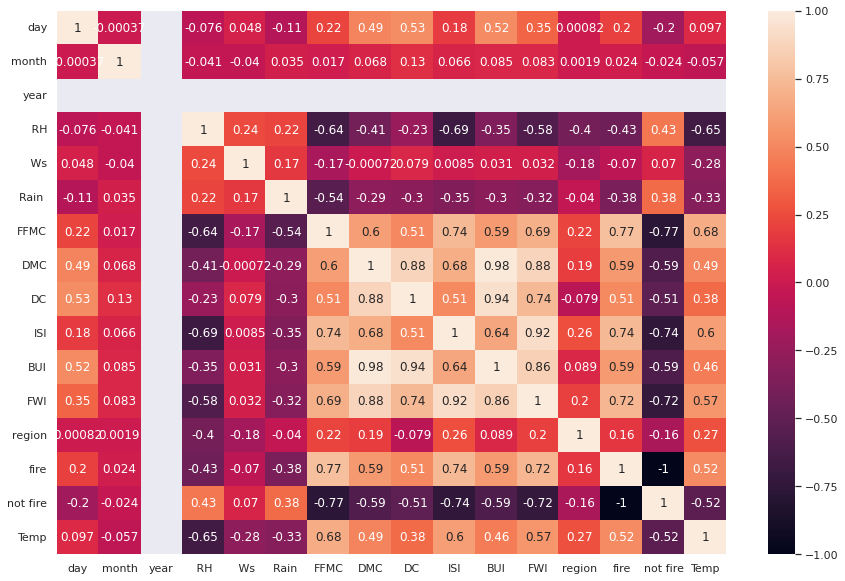

In [56]:
sb.set(rc = {"figure.figsize":(15,10)})
sb.heatmap(df1.corr(),annot = True) 

In [ ]:
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sb.kdeplot(x=col, data= df1,shade = True,color = "b")
    plt.legend(labels= ['Bejaia'])
    plt.show()

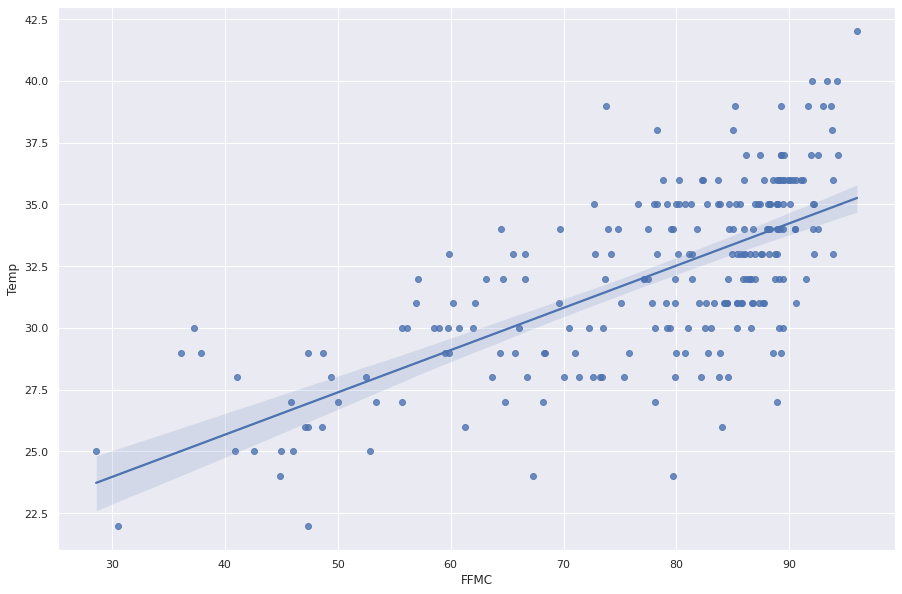

In [66]:
sb.regplot(y = df1["Temp"], x = df1["FFMC"])

Above Feature shows positive co-relation with Temperature

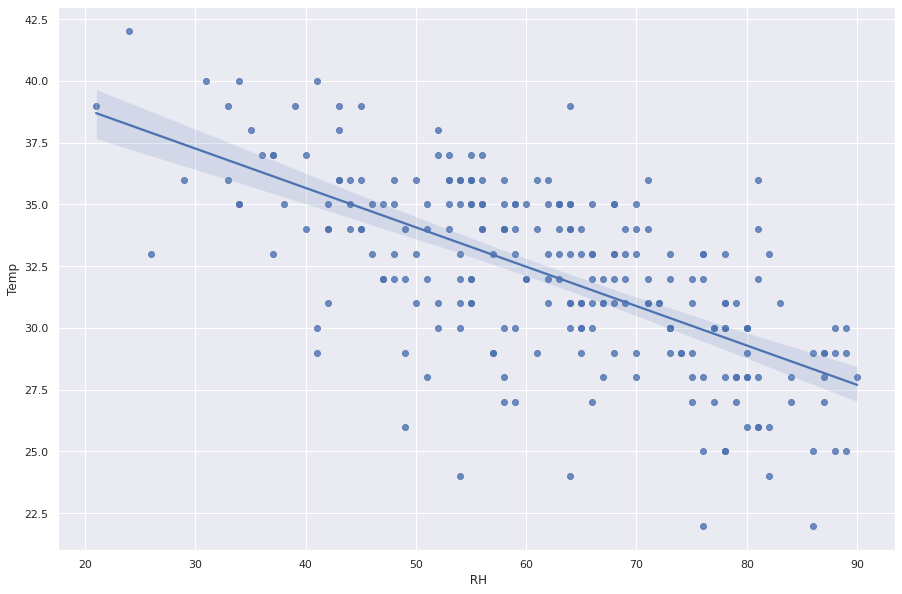

In [69]:
sb.regplot(y = df1["Temp"], x = df1[" RH"])

Above Feature shows negative co-relation with temperature.

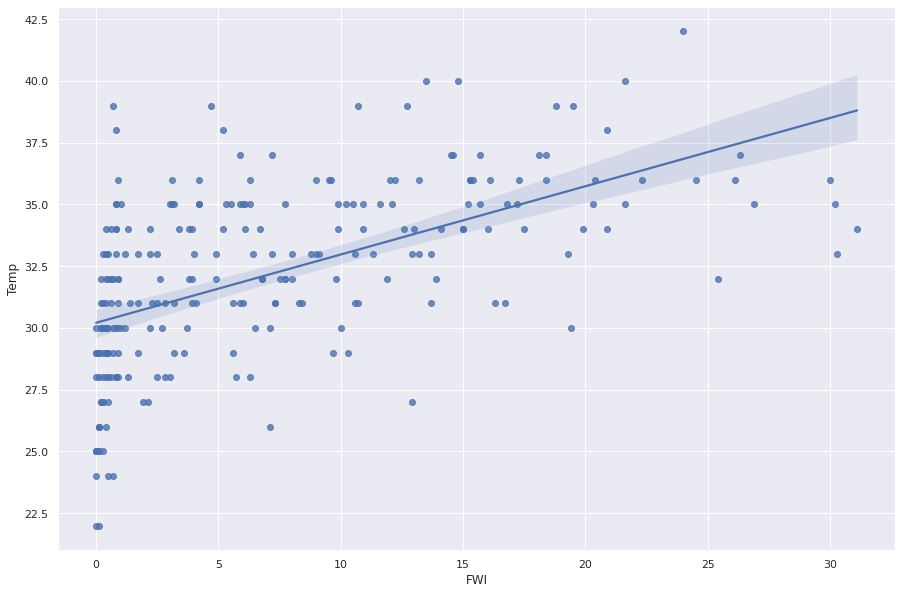

In [72]:
sb.regplot(y = df1["Temp"], x = df1["FWI"])

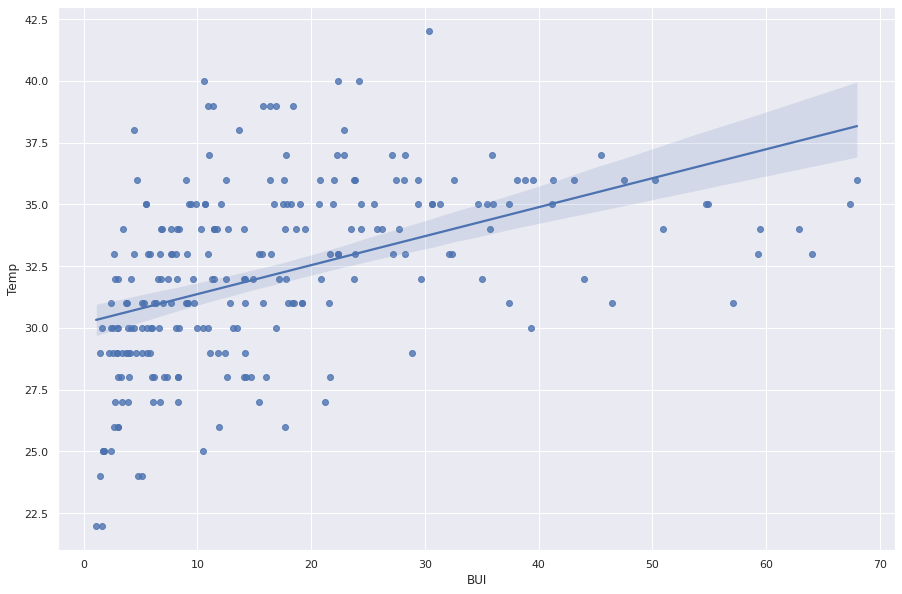

In [73]:
sb.regplot(y = df1["Temp"], x = df1["BUI"])

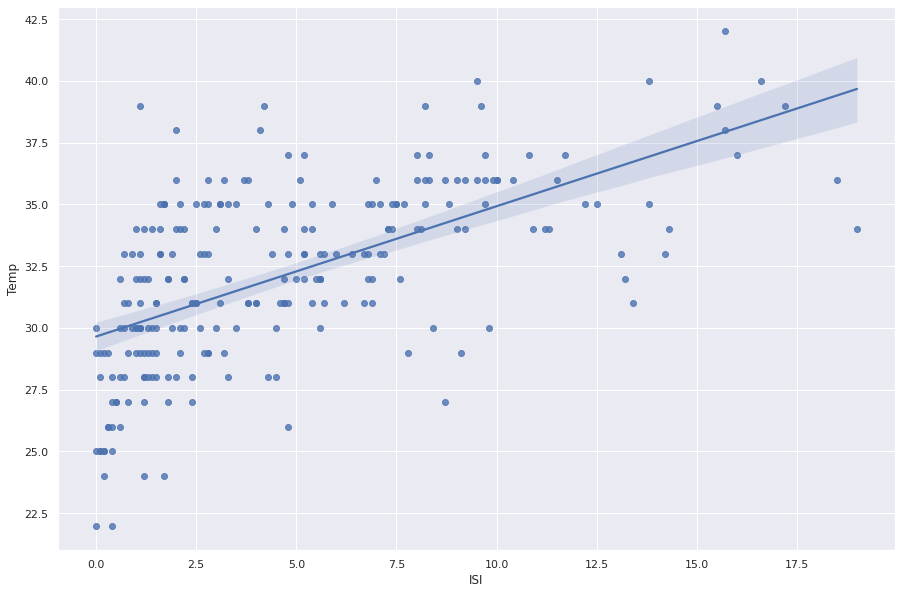

In [74]:
sb.regplot(y = df1["Temp"], x = df1["ISI"])

For Bejaia Region

In [123]:
x_b = df1.iloc[0:122,0:-1]
y_b = df1.iloc[0:122,-1]

Splitting the dataset

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_b,y_b,test_size = 0.20,random_state= 20)

Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)

array([[ 0.22970456, -0.42142722,  0.        , ...,  0.        ,
         1.0749677 , -1.0749677 ],
       [-0.3329556 , -1.29118127,  0.        , ...,  0.        ,
        -0.93026051,  0.93026051],
       [-1.68333997, -1.29118127,  0.        , ...,  0.        ,
        -0.93026051,  0.93026051],
       ...,
       [ 0.0046405 , -1.29118127,  0.        , ...,  0.        ,
        -0.93026051,  0.93026051],
       [ 1.58008893,  0.44832683,  0.        , ...,  0.        ,
        -0.93026051,  0.93026051],
       [-0.89561575,  1.31808087,  0.        , ...,  0.        ,
        -0.93026051,  0.93026051]])

Model Training

In [126]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [127]:
lr.coef_

array([-5.74430298e-02, -2.09519029e-01, -6.10622664e-16, -5.89146321e-02,
       -1.70069860e-01,  2.67508371e-03,  1.19338394e-01, -1.44317815e-01,
        2.36208574e-02,  2.06858639e-02,  5.05456316e-02,  1.99921525e-01,
        0.00000000e+00, -1.24856760e+00,  1.24856760e+00])

In [128]:
lr.intercept_

29.917954986890226

In [129]:
lr.score(x_train,y_train)

0.6852164079373106

Predicting the test set

In [130]:
y_pred_b = lr.predict(x_test)

Score

In [131]:
lr.score(x_test,y_test)

0.6362102709891573

In [132]:
px.scatter(x = y_pred_b, y = y_test)

In [133]:
residuals = y_pred_b-y_test

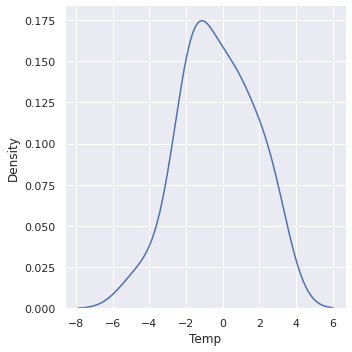

In [134]:
sb.displot(residuals,kind = "kde")

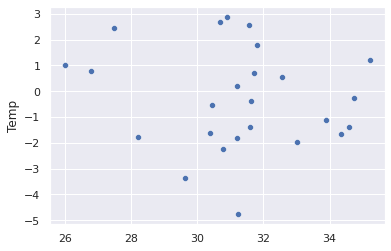

In [135]:
sb.scatterplot(x = y_pred_b,y = residuals)

Performance Matrix

In [136]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_b))
print(mean_absolute_error(y_test,y_pred_b))
print(np.sqrt(mean_squared_error(y_test,y_pred_b)))

3.8439477926201686
1.6494409885138612
1.9605988352083066


In [137]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_b)
score

0.6362102709891573

#Ridge Regression

In [138]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [139]:
ridge.score(x_train,y_train)

0.6849716212761426

In [140]:
ridge.predict(x_test)

array([31.81247545, 31.41080503, 32.59684692, 29.60535412, 30.51683875,
       34.70161143, 31.31002945, 34.28833517, 31.56914269, 31.24218392,
       26.77993693, 30.83585673, 30.34277905, 34.58514714, 31.63366673,
       30.90393201, 27.49601949, 33.07154821, 31.67007804, 26.0242243 ,
       28.18842598, 30.61333227, 35.16063643, 33.89997024, 31.73361446])

In [141]:
ridge.score(x_test,y_test)

0.6476407703377914

In [142]:
ridge.coef_

array([-0.05785709, -0.20605777,  0.        , -0.06215317, -0.16476954,
       -0.0019869 ,  0.11727829, -0.13232712,  0.02504143, -0.02062251,
        0.03534772,  0.20689234,  0.        , -1.13421877,  1.13421877])

In [143]:
ridge.intercept_

30.322428706393172

#Lasso Regression

In [144]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [145]:
lasso.coef_

array([-5.98242494e-02, -1.09920268e-01,  0.00000000e+00, -8.56495637e-02,
       -1.13267536e-01, -4.27388709e-02,  8.53232818e-02, -4.29883290e-02,
        2.57925358e-02,  0.00000000e+00, -0.00000000e+00,  4.34411836e-02,
        0.00000000e+00, -5.30615884e-01,  6.70081274e-15])

In [146]:
lasso.intercept_

33.38166197613387

In [147]:
lasso.score(x_train,y_train)

0.6641703691309664

In [148]:
lasso.predict(x_test)

array([32.24027779, 32.59229721, 32.9452673 , 29.36445469, 31.12343995,
       34.31661874, 31.98788073, 33.91819411, 31.38179692, 31.6220503 ,
       26.56636526, 30.35129808, 30.21892807, 34.32144963, 32.02507326,
       31.80665055, 27.65669476, 33.34342528, 32.14600521, 26.22706418,
       28.10949012, 30.22686075, 34.63897891, 34.0946444 , 31.24810584])

In [149]:
lasso.score(x_test,y_test)

0.7066670017046632

#Elastic Net 

In [150]:
from sklearn.linear_model import ElasticNet
El = ElasticNet()
El.fit(x_train,y_train)

ElasticNet()

In [151]:
El.coef_

array([-0.05483939, -0.        ,  0.        , -0.08753607, -0.05793056,
       -0.        ,  0.0828056 , -0.        ,  0.01817341,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ])

In [152]:
El.intercept_

31.73903092003005

In [153]:
El.score(x_train,y_train)

0.641255393551406

In [154]:
El.predict(x_test)

array([32.22794534, 32.763036  , 32.9606979 , 29.22713613, 31.39270853,
       33.96044   , 31.97724248, 33.75127241, 31.00735329, 31.84605661,
       27.15125786, 29.9129962 , 30.16404428, 34.31047573, 32.24037781,
       31.95238498, 27.99198907, 33.39303272, 32.43418977, 26.31756058,
       28.14812188, 30.10445152, 34.4840727 , 34.14416187, 31.11316829])

In [155]:
El.score(x_test,y_test)

0.7116952273081792

#Sid Abees Region

In [157]:
x_s = df1.iloc[122:,0:-1]
y_s = df1.iloc[122:,-1]

Splitting the dataset

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size = 0.20,random_state= 20)

Scaling

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)

array([[ 0.35789988, -0.42400886,  0.        , ...,  0.        ,
         0.74053163, -0.74053163],
       [-0.31579401, -1.2900695 ,  0.        , ...,  0.        ,
        -1.35038121,  1.35038121],
       [-1.66318178, -1.2900695 ,  0.        , ...,  0.        ,
        -1.35038121,  1.35038121],
       ...,
       [ 0.02105293, -1.2900695 ,  0.        , ...,  0.        ,
        -1.35038121,  1.35038121],
       [ 1.70528765,  0.44205179,  0.        , ...,  0.        ,
         0.74053163, -0.74053163],
       [-0.76492327,  1.30811243,  0.        , ...,  0.        ,
         0.74053163, -0.74053163]])

Model Training

In [160]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [161]:
lr.coef_

array([-2.65893148e-02, -4.84732953e-01,  1.94289029e-16, -5.96507331e-02,
       -2.14298644e-01,  3.51373658e-01,  2.71895356e-02,  2.18603451e-01,
        2.57840229e-02,  1.04891006e-01, -2.44280192e-01,  9.18582172e-03,
        0.00000000e+00,  1.01277931e+00, -1.01277931e+00])

In [162]:
lr.intercept_

39.7656572310797

In [163]:
lr.score(x_train,y_train)

0.4741700201242126

Predicting the test set

In [164]:
y_pred_b = lr.predict(x_test)

Score

In [165]:
lr.score(x_test,y_test)

0.621111941245895

In [166]:
px.scatter(x = y_pred_b, y = y_test)

In [167]:
residuals = y_pred_b-y_test

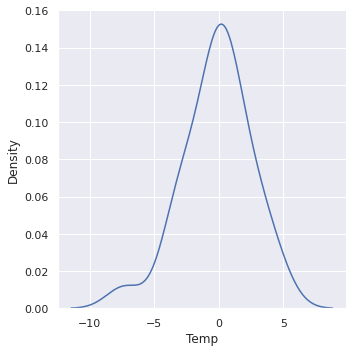

In [168]:
sb.displot(residuals,kind = "kde")

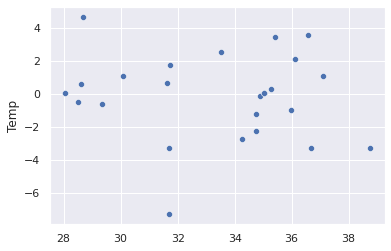

In [169]:
sb.scatterplot(x = y_pred_b,y = residuals)

Performance Matrix

In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_b))
print(mean_absolute_error(y_test,y_pred_b))
print(np.sqrt(mean_squared_error(y_test,y_pred_b)))

6.611445070035631
1.9010855489694822
2.571273044628989


In [171]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_b)
score

0.621111941245895

#Ridge Regression

In [172]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [173]:
ridge.score(x_train,y_train)

0.47402018130871726

In [174]:
ridge.predict(x_test)

array([31.78696274, 38.76758003, 34.81443288, 29.49122131, 27.97649079,
       34.98435883, 34.96819145, 28.65972294, 31.67447774, 35.44534009,
       30.04610032, 31.75024962, 34.63619055, 34.75406998, 35.10795167,
       37.1336702 , 28.70687652, 35.9919512 , 34.22340936, 28.73171262,
       31.61586951, 33.51356227, 36.14496614, 36.72074112, 36.58459448])

In [175]:
ridge.score(x_test,y_test)

0.6235399112189519

In [176]:
ridge.coef_

array([-0.02639771, -0.47864694,  0.        , -0.05805933, -0.21591984,
        0.34155162,  0.03185414,  0.21231203,  0.02522919,  0.10814756,
       -0.23766887,  0.01216866,  0.        ,  0.92148857, -0.92148857])

In [177]:
ridge.intercept_

39.27733730976546

#Lasso Regression

In [178]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [179]:
lasso.coef_

array([-0.0226447 , -0.37266579,  0.        , -0.04764005, -0.21324877,
        0.20198817,  0.07384579,  0.10423859,  0.01279982,  0.13213819,
       -0.10350778,  0.02394304,  0.        ,  0.10204689, -0.        ])

In [180]:
lasso.intercept_

34.456105779363725

In [181]:
lasso.score(x_train,y_train)

0.45477642556536846

In [182]:
lasso.predict(x_test)

array([32.69135945, 38.85736384, 34.11277065, 30.75150033, 27.22251545,
       34.5816404 , 34.20255085, 29.97800224, 31.01120876, 35.64164277,
       29.45527534, 32.41056268, 33.63177873, 34.87448944, 33.52362395,
       37.42183796, 29.76151542, 35.89807794, 33.95203701, 29.46630069,
       31.50217981, 33.48134262, 36.4279224 , 36.93852433, 36.75258596])

In [183]:
lasso.score(x_test,y_test)

0.6093532181275801

#Elastic Net 

In [184]:
from sklearn.linear_model import ElasticNet
El = ElasticNet()
El.fit(x_train,y_train)

ElasticNet()

In [185]:
El.coef_

array([-0.01175659, -0.        ,  0.        , -0.06941878, -0.10703859,
        0.        ,  0.0729822 ,  0.03647284, -0.00287236,  0.0123417 ,
       -0.        ,  0.03409144,  0.        ,  0.        , -0.        ])

In [186]:
El.intercept_

32.00517630310343

In [187]:
El.score(x_train,y_train)

0.41306192126330965

In [188]:
El.predict(x_test)

array([32.70849512, 38.07984521, 34.29869221, 31.34615209, 27.25763262,
       35.16118311, 33.49197949, 30.05293668, 29.67799433, 35.54773927,
       28.53761871, 32.10969995, 33.77480054, 34.9492991 , 33.08881324,
       37.13535392, 30.91063754, 35.7018494 , 33.84068178, 30.63885827,
       31.32202312, 33.41385014, 36.5672307 , 36.62211164, 36.91010667])

In [189]:
El.score(x_test,y_test)

0.5305473469671188